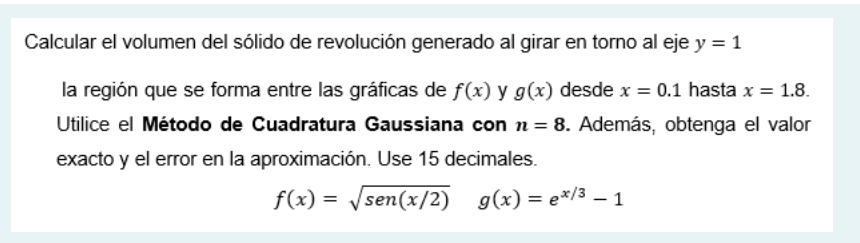

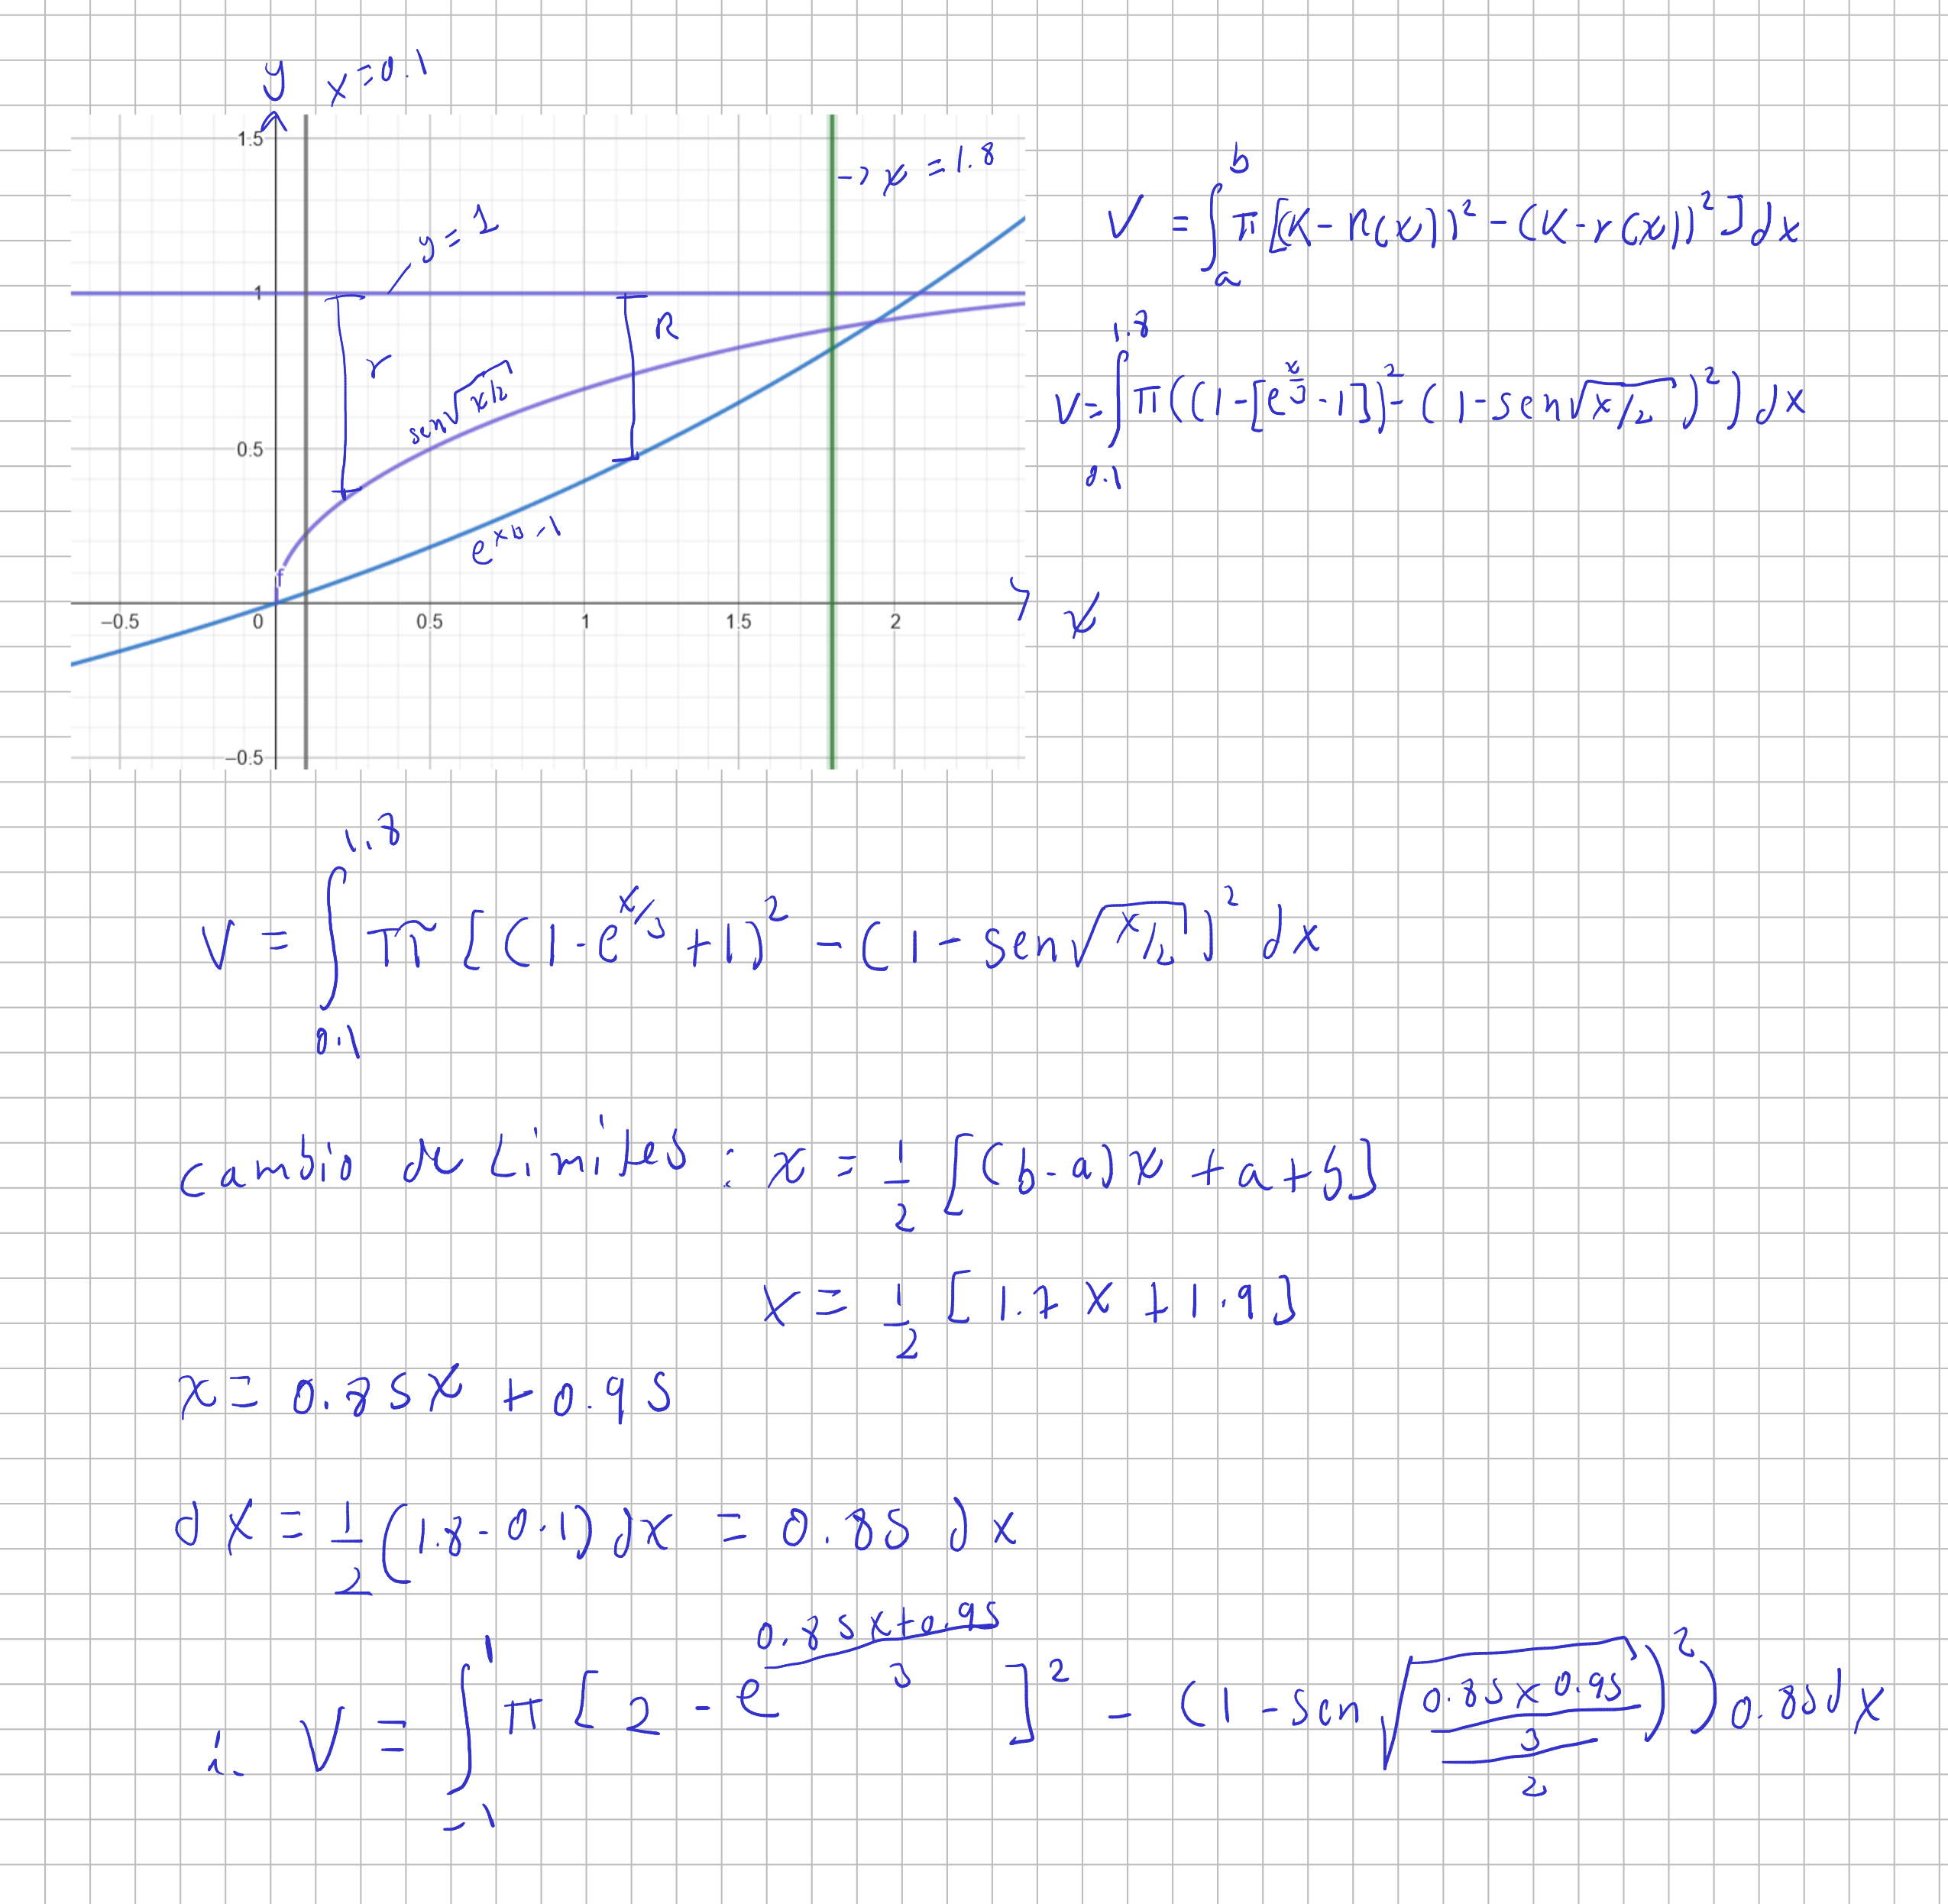

In [34]:
# Solución en python con cuadratura gaussiana n=8

from sympy import *

x = symbols("x")

# Declaro mi función original para encontrar el valor exacto
g = pi * ((2 - exp(x/3))**2 - (1 - sin(sqrt(x/2)))**2)

# declaro mi función con límites cambiados
f= pi * ((2 - exp((0.85*x + 0.95)/3))**2 - (1 - sin(sqrt((0.85*x + 0.95)/2)))**2)*0.85

# Ocupo el polinomio de Legendre P_8(x)
pl8 = x**8 - (28/15)*x**6 + (14/13)*x**4 - (28/143)*x**2 + (7/1287)

# Obtengo las raíces

raices = nroots(pl8)

print(raices)

[-0.960289856497536, -0.796666477413626, -0.525532409916329, -0.183434642495650, 0.183434642495650, 0.525532409916329, 0.796666477413626, 0.960289856497536]


In [35]:
# declaro la derivada simbólica del polinomio

dp8 = diff(pl8)
# obtengo los pesos en una lista con el siguiente for
pesos = []
for i in range(8):
    pesos.append(
        float(
            (1 / dp8.subs(x, raices[i])) * 
            integrate(pl8 / (x - raices[i]), (x, -1, 1))
        )
    )

print(pesos)

[0.10122853629037562, 0.22238103445337712, 0.3137066458778862, 0.3626837833783624, 0.3626837833783615, 0.31370664587788716, 0.22238103445337654, 0.10122853629037562]


In [36]:
# ahora obtengo el valor aproximado con un bucle

valor_aproximado = 0

for i in range(8):
    valor_aproximado += pesos[i]*f.subs(x, raices[i])

print(f"El valor aproximado de la integral es:{float(valor_aproximado)}")

El valor aproximado de la integral es:1.2800118544275068


In [37]:
# Obtengo el valor exacto en la función original como corroboración.

valor_exacto = float(integrate(g, (x, 0.1, 1.8)))
print(valor_exacto)

1.2800012497789106


In [38]:
# Pruebas con PL7

# Ocupo el polinomio de Legendre P_8(x)
pl7 = x**7 - (21/13)*x**5 + (105/143)*x**3 - (35/429)*x

# Obtengo las raíces

raices_pl7 = nroots(pl7)

dp7 = diff(pl7)
# obtengo los pesos en una lista con el siguiente for
pesos_7 = []
for i in range(7):
    pesos_7.append(
        float(
            (1 / dp7.subs(x, raices_pl7[i])) * 
            integrate(pl7 / (x - raices_pl7[i]), (x, -1, 1))
        )
    )

valor_aproximado_pl7 = 0

for i in range(7):
    valor_aproximado_pl7 += pesos_7[i]*f.subs(x, raices[i])

print(f"El valor aproximado de la integral es:{float(valor_aproximado_pl7)}")

El valor aproximado de la integral es:1.4819158162496593
